In [2]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns
import pickle

In [3]:
data = pd.read_csv("../Mall_Customers.csv")
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X = data.iloc[:, 1:5].values
X.shape

(200, 4)

In [6]:
# cleanup_data = {'Gender': {'Male' : 0, 'Female' : 1}}
# df = pd.DataFrame(data)

# df=df.replace(cleanup_data)
# df.head()
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

X

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [7]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

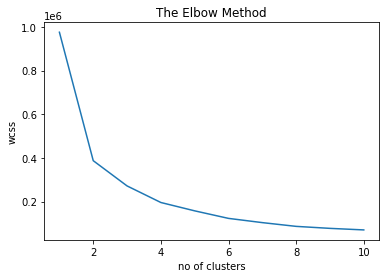

In [14]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
wcss

[975512.06,
 387065.7137713772,
 271384.50878286787,
 195401.19855991477,
 157183.29637394776,
 122630.44175335614,
 103233.01724386725,
 86053.67444777439,
 76915.6613507064,
 69809.37279032565]

In [14]:
#Model Build
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

y_kmeans
pickle.dump(kmeansmodel, open('kmeans_5_clusters.pkl', 'wb'))

In [15]:
data["Cluster"] = y_kmeans
data.head(20)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
5,6,Female,22,17,76,1
6,7,Female,35,18,6,1
7,8,Female,23,18,94,1
8,9,Male,64,19,3,0
9,10,Female,30,19,72,1


In [16]:
cluster1 = df[df['Cluster'] == 0]
cluster2 = df[df['Cluster'] == 2]
cluster3 = df[df['Cluster'] == 3]
cluster4 = df[df['Cluster'] == 4]
# cluster5 = df[df['Cluster'] == 5]

NameError: name 'df' is not defined

In [24]:
clusters_info = dict()
def get_cluster_info() :
    for i in range(0,2):
        cluster = dict()
        current_cluster = data[data['Cluster'] == i]
        for (column_name, column_data) in current_cluster.items():
            if (column_name.find('ID') != -1):
                continue
            
            if (column_data.dtype == 'object'):
                unique_values = current_cluster[column_name].unique()
                categorical = dict()
                for val in unique_values:
                    categorical[val] = np.sum(current_cluster[column_name] == val)
                    cluster[column_name]=categorical
            else: 
                col_max = current_cluster[column_name].max()
                col_min = current_cluster[column_name].min()
                col_mean = current_cluster[column_name].mean()
                col_std = current_cluster[column_name].std()

                cluster[column_name] = {
                    'max': col_max,
                    'min': col_min,
                    'mean': col_mean,
                    'std': col_std
                }
            cluster['center'] = kmeans.cluster_centers_[:, i]

            clusters_info[i] = cluster
    

get_cluster_info()

clusters_info

{0: {'Gender': {'Male': 88},
  'center': array([ 1.00000000e+00,  3.33066907e-16,  1.00000000e+00, -1.11022302e-16,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.00000000e+00]),
  'Age': {'max': 70,
   'min': 18,
   'mean': 39.80681818181818,
   'std': 15.514811576858186},
  'Annual Income (k$)': {'max': 137,
   'min': 15,
   'mean': 62.22727272727273,
   'std': 26.638373182494128},
  'Spending Score (1-100)': {'max': 97,
   'min': 1,
   'mean': 48.51136363636363,
   'std': 27.896769605833597},
  'Cluster': {'max': 0, 'min': 0, 'mean': 0.0, 'std': 0.0}},
 1: {'Gender': {'Female': 112},
  'center': array([-4.99600361e-16,  1.00000000e+00, -5.55111512e-17,  1.00000000e+00,
         -5.55111512e-17,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          1.00000000e+00, -5.55111512e-17]),
  'Age': {'max': 68,
   'min': 18,
   'mean': 38.098214285714285,
   'std': 12.644095457392353},
  'Annual Income (k$)': {'max': 126,
   '

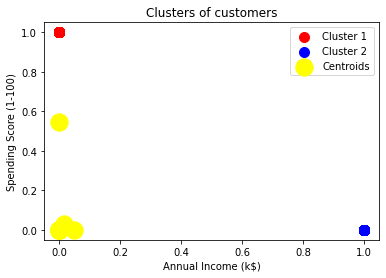

In [18]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [109]:
kmeans.cluster_centers_

array([[ 2.11904762e+01,  6.19047619e-01,  4.41428571e+01,
         2.51428571e+01,  1.95238095e+01,  3.00000000e+00],
       [ 1.44000000e+02,  5.71428571e-01,  3.31428571e+01,
         7.50952381e+01,  8.27619048e+01,  2.00000000e+00],
       [ 5.72307692e+01,  6.15384615e-01,  2.66923077e+01,
         4.40769231e+01,  5.35384615e+01,  7.69230769e-02],
       [ 1.44000000e+02,  4.50000000e-01,  3.76000000e+01,
         7.54000000e+01,  1.75000000e+01,  3.40000000e+00],
       [ 1.83000000e+02,  5.00000000e-01,  3.21666667e+01,
         9.98888889e+01,  8.13888889e+01,  2.00000000e+00],
       [ 2.20000000e+01,  5.71428571e-01,  2.53333333e+01,
         2.50952381e+01,  8.00476190e+01,  1.00000000e+00],
       [ 1.04750000e+02,  5.50000000e-01,  5.50500000e+01,
         6.21500000e+01,  5.02500000e+01, -8.88178420e-16],
       [ 1.01047619e+02,  6.66666667e-01,  2.60476190e+01,
         6.08571429e+01,  4.89047619e+01, -6.66133815e-16],
       [ 1.82000000e+02,  5.00000000e-01,  4.350